# ANFIS
Case : Mackey glass series

https://en.wikipedia.org/wiki/Mackey-Glass_equations


In [1]:
import time
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt
from anfis import ANFIS

2021-12-07 22:06:57.292790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-07 22:06:57.292839: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Mackey-Glass series computation
def mackey(n_iters):
    x = np.zeros((n_iters,))
    x[0:30] = 0.23 * np.ones((30,))
    t_s = 30
    for i in range(30, n_iters - 1):
        a = x[i]
        b = x[i - t_s]
        y = ((0.2 * b) / (1 + b ** 10)) + 0.9 * a
        x[i + 1] = y
    return x


# Generate dataset
D = 4  # number of regressors
T = 1  # delay
N = 2000  # Number of points to generate
mg_series = mackey(N)[499:]  # Use last 1500 points
data = np.zeros((N - 500 - T - (D - 1) * T, D))
labels = np.zeros((N - 500 - T - (D - 1) * T,))

for t in range((D - 1) * T, N - 500 - T):
    data[t - (D - 1) * T, :] = [mg_series[t - 3 * T], mg_series[t - 2 * T], mg_series[t - T], mg_series[t]]
    labels[t - (D - 1) * T] = mg_series[t + T]
trainx = data[:labels.size - round(labels.size * 0.3), :]
trainy = labels[:labels.size - round(labels.size * 0.3)]
testx = data[labels.size - round(labels.size * 0.3):, :]
testy = labels[labels.size - round(labels.size * 0.3):]

In [3]:
def anfisTrain(num_epochs, trainx, trainy, testx, testy, fis = None):
    if fis == None:
        fis = ANFIS(n_inputs=D, n_rules=m, learning_rate=alpha)
    # Initialize session to make computations on the Tensorflow graph
    with tf.Session() as sess:
        # Initialize model parameters
        sess.run(fis.init_variables)
        trn_costs = []
        val_costs = []
        time_start = time.time()
        for epoch in range(num_epochs):
            #  Run an update step
            trn_loss, trn_pred = fis.train(sess, trainx, trainy)
            # Evaluate on validation set
            val_pred, val_loss = fis.infer(sess, testx, testy)
            if epoch % 10 == 0:
                print("Train cost after epoch %i: %f" % (epoch, trn_loss))
            if epoch == num_epochs - 1:
                time_end = time.time()
                print("Elapsed time: %f" % (time_end - time_start))
                print("Validation loss: %f" % val_loss)
                # Plot real vs. predicted
                pred = np.vstack((np.expand_dims(trn_pred, 1), np.expand_dims(val_pred, 1)))
                plt.figure(1)
                plt.plot(mg_series)
                plt.plot(pred)
            trn_costs.append(trn_loss)
            val_costs.append(val_loss)
        # Plot the cost over epochs
        plt.figure(2)
        plt.subplot(2, 1, 1)
        plt.plot(np.squeeze(trn_costs))
        plt.title("Training loss, Learning rate =" + str(alpha))
        plt.subplot(2, 1, 2)
        plt.plot(np.squeeze(val_costs))
        plt.title("Validation loss, Learning rate =" + str(alpha))
        plt.ylabel('Cost')
        plt.xlabel('Epochs')
        # Plot resulting membership functions
        fis.plotmfs(sess)
        plt.show()

2021-12-07 22:07:01.884995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-07 22:07:01.885049: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-07 22:07:01.885082: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (zam-X550IU): /proc/driver/nvidia/version does not exist
2021-12-07 22:07:01.885493: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train cost after epoch 0: 1.633189
Train cost after epoch 10: 0.776700
Train cost after epoch 20: 0.096263
Train cost after epoch 30: 0.010497
Train cost after epoch 40: 0.010584
Train cost after epoch 50: 0.007604
Train cost after epoch 60: 0.005841
Train cost after epoch 70: 0.005551
Train cost after epoch 80: 0.005266
Train cost after epoch 90: 0.004984
Elapsed time: 1.399026
Validation loss: 0.004834


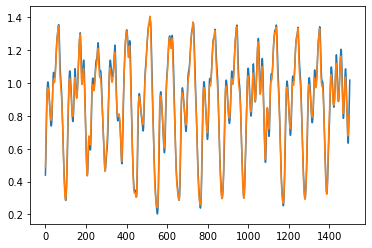

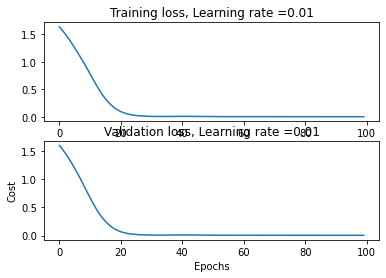

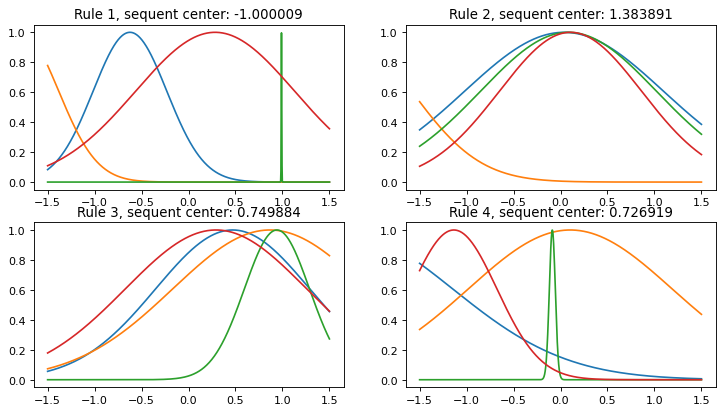

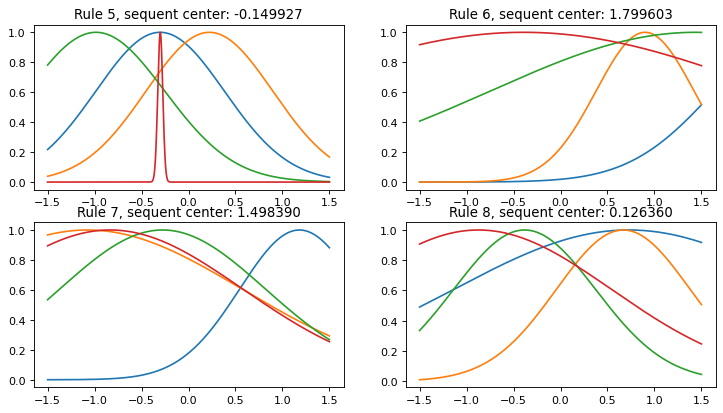

In [ ]:
# ANFIS params and Tensorflow graph initialization
m = 16  # number of rules
alpha = 0.01  # learning rate
# Training
num_epochs = 100

anfisTrain(num_epochs, trainx, trainy, testx, testy,
    ANFIS(n_inputs=D, n_rules=m, learning_rate=alpha)
)